## Logistic Regression
- binary classification의 대표적인 알고리즘
- H(x) = f(Wx + b)
- f(x) = sigmoid()

### Sigmoid

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

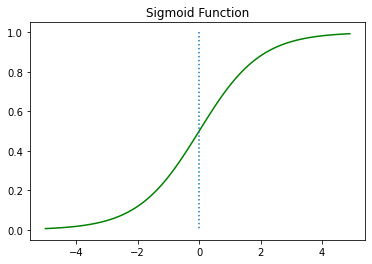

In [3]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y,'g')
plt.plot([0,0],[1.0,0.0],':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

#### W값의 변화에 따른 경사도의 변화
- 그래프의 경사도를 결정한다.

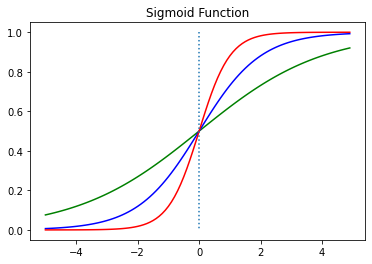

In [4]:
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x,y1,'g')
plt.plot(x,y2,'b')
plt.plot(x,y3,'r')

plt.plot([0,0],[1.0,0.0],':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

#### b값의 변화에 따른 좌, 우 이동

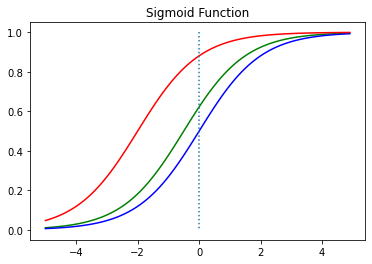

In [5]:
x = np.arange(-5.0,5.0,0.1)
y1 = sigmoid(0.5+x)
y2 = sigmoid(x)
y3 = sigmoid(2+x)

plt.plot(x,y1,'g')
plt.plot(x,y2,'b')
plt.plot(x,y3,'r')

plt.plot([0,0],[1.0,0.0],':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### Pytorch Logistic Regression

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [2]:
x_data = [
    [1,2],
    [2,3],
    [3,1],
    [4,3],
    [5,3],
    [6,2]
]

y_data = [[0],[0],[0],[1],[1],[1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [3]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [4]:
W = torch.zeros((2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [5]:
h = 1 / (1+torch.exp(-(x_train.matmul(W) + b)))

In [6]:
hypo = torch.sigmoid(x_train.matmul(W) + b)

In [8]:
losses = -(y_train * torch.log(hypo) + (1-y_train)*torch.log(1-hypo))
cost = losses.mean()

In [ ]:
F.binary_cross_entropy(hypo,y_train)

___

In [9]:
x_data = [
    [1,2],
    [2,3],
    [3,1],
    [4,3],
    [5,3],
    [6,2]
]

y_data = [[0],[0],[0],[1],[1],[1]]

x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [10]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [11]:
W = torch.zeros((2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [12]:
optimizer = optim.SGD([W,b],lr=1)

In [14]:
nb_epochs = 1000
for epoch in range(nb_epochs+1):

    hypo = torch.sigmoid(x_train.matmul(W) + b)

    cost = -(y_train*torch.log(hypo) + (1-y_train)*torch.log(1-hypo)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch : {epoch}/{nb_epochs} cost : {cost.item()}')

epoch : 0/1000 cost : 0.6931471824645996
epoch : 100/1000 cost : 0.134722039103508
epoch : 200/1000 cost : 0.08064312487840652
epoch : 300/1000 cost : 0.05790000781416893
epoch : 400/1000 cost : 0.04529969021677971
epoch : 500/1000 cost : 0.03726097196340561
epoch : 600/1000 cost : 0.031672511249780655
epoch : 700/1000 cost : 0.027555957436561584
epoch : 800/1000 cost : 0.024394357576966286
epoch : 900/1000 cost : 0.021888330578804016
epoch : 1000/1000 cost : 0.019852163270115852
